# **WEBSCRAPING CODE**

In [117]:
!pip install bs4

# Chennai

In [118]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Step 1: Fetch the webpage content
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amahindra%3AOR%3Amake%3A%3D%3Ajeep%3AOR%3Amake%3A%3D%3Arenault&sort=bestmatch&serveWarrantyCount=true&gaId=2135718455.1725707831&listingSource=TabFilter&storeCityId=5732"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all car entries
car_entries = soup.find_all('div', class_='_7jb8Q _1Ey60')

# Step 4: Loop through each car entry and extract details
cars_data = []

for car in car_entries:
    # Extract car title and model
    car_title = car.find('h3', class_='_2Out2').contents[0].strip() if car.find('h3', class_='_2Out2') else None
    car_model = car.find('h3', class_='_2Out2').find('span').text.strip() if car.find('h3', class_='_2Out2').find('span') else None

    # Extract the year from the car title
    year = car_title.split()[0] if car_title else None
    car_title = ' '.join(car_title.split()[1:]) if car_title else None  # Remove the year from the title

    # Extract mileage, fuel type, and ownership using more flexible methods
    details_list = car.find('ul', class_='_3jRcd').find_all('li') if car.find('ul', class_='_3jRcd') else []

    # Use regular expression to find mileage
    mileage = None
    if details_list:
        for detail in details_list:
            if re.search(r'\d+[,.\d]*\s*km', detail.text, re.IGNORECASE):
                mileage = detail.text.strip()
                break

    if mileage and not mileage.lower().endswith('km'):
        mileage += " km"

    # Extract fuel type using keyword search
    fuel_type = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "petrol" in text:
            fuel_type = "Petrol"
            break
        elif "diesel" in text:
            fuel_type = "Diesel"
            break

    # Extract ownership using keyword search
    ownership = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "1st owner" in text:
            ownership = "1st Owner"
            break
        elif "2nd owner" in text:
            ownership = "2nd Owner"
            break

    # Extract EMI information and remove "EMI from" text
    emi_info = car.find('div', class_='_1Oul-').find('span', class_='_1t1AA').text.strip() if car.find('div', class_='_1Oul-') else None
    if emi_info:
        emi_info = emi_info.replace('EMI from', '').strip()

    # Extract price details
    price_div = car.find('div', class_='_1Oul- VMjdr')
    current_price = price_div.find('strong', class_='_37WXy').text.strip() if price_div and price_div.find('strong', class_='_37WXy') else None
    original_price = price_div.find('span', class_='_3hb01').text.strip() if price_div and price_div.find('span', class_='_3hb01') else None

    # Extract location details only and remove "at"
    location_info = car.find('p', class_='_2rxhF').find('span').text.strip() if car.find('p', class_='_2rxhF') and car.find('p', class_='_2rxhF').find('span') else None
    if location_info:
        location_info = location_info.replace('at', '').strip()

    # Store extracted details in a dictionary
    car_details = {
        'Year': year,
        'Car Title': car_title,
        'Car Model': car_model,
        'Mileage': mileage,
        'Fuel Type': fuel_type,
        'Ownership': ownership,
        'EMI Info': emi_info,
        'Current Price': current_price,
        'Original Price': original_price,
        'Location': location_info
    }

    cars_data.append(car_details)

# Step 5: Create a DataFrame using pandas
df = pd.DataFrame(cars_data)

# Step 6: Save the DataFrame to an Excel file
df.to_excel('chennai.xlsx', index=False)

# Step 7: Save the DataFrame to a CSV file
df.to_csv('chennai.csv', index=False)

print("Data has been successfully saved to 'chennai.xlsx' and 'chennai.csv'.")


Data has been successfully saved to 'chennai.xlsx' and 'chennai.csv'.


# Surat

In [119]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Step 1: Fetch the webpage content
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amahindra%3AOR%3Amake%3A%3D%3Ajeep%3AOR%3Amake%3A%3D%3Arenault&sort=bestmatch&serveWarrantyCount=true&gaId=2135718455.1725707831&listingSource=TabFilter&storeCityId=1605"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all car entries
car_entries = soup.find_all('div', class_='_7jb8Q _1Ey60')

# Step 4: Loop through each car entry and extract details
cars_data = []

for car in car_entries:
    # Extract car title and model
    car_title = car.find('h3', class_='_2Out2').contents[0].strip() if car.find('h3', class_='_2Out2') else None
    car_model = car.find('h3', class_='_2Out2').find('span').text.strip() if car.find('h3', class_='_2Out2').find('span') else None

    # Extract the year from the car title
    year = car_title.split()[0] if car_title else None
    car_title = ' '.join(car_title.split()[1:]) if car_title else None  # Remove the year from the title

    # Extract mileage, fuel type, and ownership using more flexible methods
    details_list = car.find('ul', class_='_3jRcd').find_all('li') if car.find('ul', class_='_3jRcd') else []

    # Use regular expression to find mileage
    mileage = None
    if details_list:
        for detail in details_list:
            if re.search(r'\d+[,.\d]*\s*km', detail.text, re.IGNORECASE):
                mileage = detail.text.strip()
                break

    if mileage and not mileage.lower().endswith('km'):
        mileage += " km"

    # Extract fuel type using keyword search
    fuel_type = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "petrol" in text:
            fuel_type = "Petrol"
            break
        elif "diesel" in text:
            fuel_type = "Diesel"
            break

    # Extract ownership using keyword search
    ownership = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "1st owner" in text:
            ownership = "1st Owner"
            break
        elif "2nd owner" in text:
            ownership = "2nd Owner"
            break

    # Extract EMI information and remove "EMI from" text
    emi_info = car.find('div', class_='_1Oul-').find('span', class_='_1t1AA').text.strip() if car.find('div', class_='_1Oul-') else None
    if emi_info:
        emi_info = emi_info.replace('EMI from', '').strip()

    # Extract price details
    price_div = car.find('div', class_='_1Oul- VMjdr')
    current_price = price_div.find('strong', class_='_37WXy').text.strip() if price_div and price_div.find('strong', class_='_37WXy') else None
    original_price = price_div.find('span', class_='_3hb01').text.strip() if price_div and price_div.find('span', class_='_3hb01') else None

    # Extract location details only and remove "at"
    location_info = car.find('p', class_='_2rxhF').find('span').text.strip() if car.find('p', class_='_2rxhF') and car.find('p', class_='_2rxhF').find('span') else None
    if location_info:
        location_info = location_info.replace('at', '').strip()

    # Store extracted details in a dictionary
    car_details = {
        'Year': year,
        'Car Title': car_title,
        'Car Model': car_model,
        'Mileage': mileage,
        'Fuel Type': fuel_type,
        'Ownership': ownership,
        'EMI Info': emi_info,
        'Current Price': current_price,
        'Original Price': original_price,
        'Location': location_info
    }

    cars_data.append(car_details)

# Step 5: Create a DataFrame using pandas
df = pd.DataFrame(cars_data)

# Step 6: Save the DataFrame to an Excel file
df.to_excel('surat.xlsx', index=False)

# Step 7: Save the DataFrame to a CSV file
df.to_csv('surat.csv', index=False)

print("Data has been successfully saved to 'surat.xlsx' and 'surat.csv'.")


Data has been successfully saved to 'surat.xlsx' and 'surat.csv'.


# Kolkata

In [120]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Step 1: Fetch the webpage content
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amahindra%3AOR%3Amake%3A%3D%3Ajeep%3AOR%3Amake%3A%3D%3Arenault&sort=bestmatch&serveWarrantyCount=true&gaId=2135718455.1725707831&storeCityId=777"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all car entries
car_entries = soup.find_all('div', class_='_7jb8Q _1Ey60')

# Step 4: Loop through each car entry and extract details
cars_data = []

for car in car_entries:
    # Extract car title and model
    car_title = car.find('h3', class_='_2Out2').contents[0].strip() if car.find('h3', class_='_2Out2') else None
    car_model = car.find('h3', class_='_2Out2').find('span').text.strip() if car.find('h3', class_='_2Out2').find('span') else None

    # Extract the year from the car title
    year = car_title.split()[0] if car_title else None
    car_title = ' '.join(car_title.split()[1:]) if car_title else None  # Remove the year from the title

    # Extract mileage, fuel type, and ownership using more flexible methods
    details_list = car.find('ul', class_='_3jRcd').find_all('li') if car.find('ul', class_='_3jRcd') else []

    # Use regular expression to find mileage
    mileage = None
    if details_list:
        for detail in details_list:
            if re.search(r'\d+[,.\d]*\s*km', detail.text, re.IGNORECASE):
                mileage = detail.text.strip()
                break

    if mileage and not mileage.lower().endswith('km'):
        mileage += " km"

    # Extract fuel type using keyword search
    fuel_type = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "petrol" in text:
            fuel_type = "Petrol"
            break
        elif "diesel" in text:
            fuel_type = "Diesel"
            break

    # Extract ownership using keyword search
    ownership = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "1st owner" in text:
            ownership = "1st Owner"
            break
        elif "2nd owner" in text:
            ownership = "2nd Owner"
            break

    # Extract EMI information and remove "EMI from" text
    emi_info = car.find('div', class_='_1Oul-').find('span', class_='_1t1AA').text.strip() if car.find('div', class_='_1Oul-') else None
    if emi_info:
        emi_info = emi_info.replace('EMI from', '').strip()

    # Extract price details
    price_div = car.find('div', class_='_1Oul- VMjdr')
    current_price = price_div.find('strong', class_='_37WXy').text.strip() if price_div and price_div.find('strong', class_='_37WXy') else None
    original_price = price_div.find('span', class_='_3hb01').text.strip() if price_div and price_div.find('span', class_='_3hb01') else None

    # Extract location details only and remove "at"
    location_info = car.find('p', class_='_2rxhF').find('span').text.strip() if car.find('p', class_='_2rxhF') and car.find('p', class_='_2rxhF').find('span') else None
    if location_info:
        location_info = location_info.replace('at', '').strip()

    # Store extracted details in a dictionary
    car_details = {
        'Year': year,
        'Car Title': car_title,
        'Car Model': car_model,
        'Mileage': mileage,
        'Fuel Type': fuel_type,
        'Ownership': ownership,
        'EMI Info': emi_info,
        'Current Price': current_price,
        'Original Price': original_price,
        'Location': location_info
    }

    cars_data.append(car_details)

# Step 5: Create a DataFrame using pandas
df = pd.DataFrame(cars_data)

# Step 6: Save the DataFrame to an Excel file
df.to_excel('kolkata.xlsx', index=False)

# Step 7: Save the DataFrame to a CSV file
df.to_csv('kolkata.csv', index=False)

print("Data has been successfully saved to 'kolkata.xlsx' and 'kolkata.csv'.")


Data has been successfully saved to 'kolkata.xlsx' and 'kolkata.csv'.


# Patna

In [121]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Step 1: Fetch the webpage content
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amahindra%3AOR%3Amake%3A%3D%3Ajeep%3AOR%3Amake%3A%3D%3Arenault&sort=bestmatch&serveWarrantyCount=true&gaId=2135718455.1725707831&storeCityId=8184"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all car entries
car_entries = soup.find_all('div', class_='_7jb8Q _1Ey60')

# Step 4: Loop through each car entry and extract details
cars_data = []

for car in car_entries:
    # Extract car title and model
    car_title = car.find('h3', class_='_2Out2').contents[0].strip() if car.find('h3', class_='_2Out2') else None
    car_model = car.find('h3', class_='_2Out2').find('span').text.strip() if car.find('h3', class_='_2Out2').find('span') else None

    # Extract the year from the car title
    year = car_title.split()[0] if car_title else None
    car_title = ' '.join(car_title.split()[1:]) if car_title else None  # Remove the year from the title

    # Extract mileage, fuel type, and ownership using more flexible methods
    details_list = car.find('ul', class_='_3jRcd').find_all('li') if car.find('ul', class_='_3jRcd') else []

    # Use regular expression to find mileage
    mileage = None
    if details_list:
        for detail in details_list:
            if re.search(r'\d+[,.\d]*\s*km', detail.text, re.IGNORECASE):
                mileage = detail.text.strip()
                break

    if mileage and not mileage.lower().endswith('km'):
        mileage += " km"

    # Extract fuel type using keyword search
    fuel_type = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "petrol" in text:
            fuel_type = "Petrol"
            break
        elif "diesel" in text:
            fuel_type = "Diesel"
            break

    # Extract ownership using keyword search
    ownership = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "1st owner" in text:
            ownership = "1st Owner"
            break
        elif "2nd owner" in text:
            ownership = "2nd Owner"
            break

    # Extract EMI information and remove "EMI from" text
    emi_info = car.find('div', class_='_1Oul-').find('span', class_='_1t1AA').text.strip() if car.find('div', class_='_1Oul-') else None
    if emi_info:
        emi_info = emi_info.replace('EMI from', '').strip()

    # Extract price details
    price_div = car.find('div', class_='_1Oul- VMjdr')
    current_price = price_div.find('strong', class_='_37WXy').text.strip() if price_div and price_div.find('strong', class_='_37WXy') else None
    original_price = price_div.find('span', class_='_3hb01').text.strip() if price_div and price_div.find('span', class_='_3hb01') else None

    # Extract location details only and remove "at"
    location_info = car.find('p', class_='_2rxhF').find('span').text.strip() if car.find('p', class_='_2rxhF') and car.find('p', class_='_2rxhF').find('span') else None
    if location_info:
        location_info = location_info.replace('at', '').strip()

    # Store extracted details in a dictionary
    car_details = {
        'Year': year,
        'Car Title': car_title,
        'Car Model': car_model,
        'Mileage': mileage,
        'Fuel Type': fuel_type,
        'Ownership': ownership,
        'EMI Info': emi_info,
        'Current Price': current_price,
        'Original Price': original_price,
        'Location': location_info
    }

    cars_data.append(car_details)

# Step 5: Create a DataFrame using pandas
df = pd.DataFrame(cars_data)

# Step 6: Save the DataFrame to an Excel file
df.to_excel('patna.xlsx', index=False)

# Step 7: Save the DataFrame to a CSV file
df.to_csv('patna.csv', index=False)

print("Data has been successfully saved to 'patna.xlsx' and 'patna.csv'.")


Data has been successfully saved to 'patna.xlsx' and 'patna.csv'.


# Coimbatore

In [122]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Step 1: Fetch the webpage content
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amahindra%3AOR%3Amake%3A%3D%3Ajeep%3AOR%3Amake%3A%3D%3Arenault&sort=bestmatch&serveWarrantyCount=true&gaId=1301600899.1725538448&storeCityId=6105"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all car entries
car_entries = soup.find_all('div', class_='_7jb8Q _1Ey60')

# Step 4: Loop through each car entry and extract details
cars_data = []

for car in car_entries:
    # Extract car title and model
    car_title = car.find('h3', class_='_2Out2').contents[0].strip() if car.find('h3', class_='_2Out2') else None
    car_model = car.find('h3', class_='_2Out2').find('span').text.strip() if car.find('h3', class_='_2Out2').find('span') else None

    # Extract the year from the car title
    year = car_title.split()[0] if car_title else None
    car_title = ' '.join(car_title.split()[1:]) if car_title else None  # Remove the year from the title

    # Extract mileage, fuel type, and ownership using more flexible methods
    details_list = car.find('ul', class_='_3jRcd').find_all('li') if car.find('ul', class_='_3jRcd') else []

    # Use regular expression to find mileage
    mileage = None
    if details_list:
        for detail in details_list:
            if re.search(r'\d+[,.\d]*\s*km', detail.text, re.IGNORECASE):
                mileage = detail.text.strip()
                break

    if mileage and not mileage.lower().endswith('km'):
        mileage += " km"

    # Extract fuel type using keyword search
    fuel_type = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "petrol" in text:
            fuel_type = "Petrol"
            break
        elif "diesel" in text:
            fuel_type = "Diesel"
            break

    # Extract ownership using keyword search
    ownership = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "1st owner" in text:
            ownership = "1st Owner"
            break
        elif "2nd owner" in text:
            ownership = "2nd Owner"
            break

    # Extract EMI information and remove "EMI from" text
    emi_info = car.find('div', class_='_1Oul-').find('span', class_='_1t1AA').text.strip() if car.find('div', class_='_1Oul-') else None
    if emi_info:
        emi_info = emi_info.replace('EMI from', '').strip()

    # Extract price details
    price_div = car.find('div', class_='_1Oul- VMjdr')
    current_price = price_div.find('strong', class_='_37WXy').text.strip() if price_div and price_div.find('strong', class_='_37WXy') else None
    original_price = price_div.find('span', class_='_3hb01').text.strip() if price_div and price_div.find('span', class_='_3hb01') else None

    # Extract location details only and remove "at"
    location_info = car.find('p', class_='_2rxhF').find('span').text.strip() if car.find('p', class_='_2rxhF') and car.find('p', class_='_2rxhF').find('span') else None
    if location_info:
        location_info = location_info.replace('at', '').strip()

    # Store extracted details in a dictionary
    car_details = {
        'Year': year,
        'Car Title': car_title,
        'Car Model': car_model,
        'Mileage': mileage,
        'Fuel Type': fuel_type,
        'Ownership': ownership,
        'EMI Info': emi_info,
        'Current Price': current_price,
        'Original Price': original_price,
        'Location': location_info
    }

    cars_data.append(car_details)

# Step 5: Create a DataFrame using pandas
df = pd.DataFrame(cars_data)

# Step 6: Save the DataFrame to an Excel file
df.to_excel('Coimbatore.xlsx', index=False)

# Step 7: Save the DataFrame to a CSV file
df.to_csv('Coimbatore.csv', index=False)

print("Data has been successfully saved to 'Coimbatore.xlsx' and 'Coimbatore.csv'.")

Data has been successfully saved to 'Coimbatore.xlsx' and 'Coimbatore.csv'.


# Kochi

In [123]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Step 1: Fetch the webpage content
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amahindra%3AOR%3Amake%3A%3D%3Ajeep%3AOR%3Amake%3A%3D%3Arenault&sort=bestmatch&serveWarrantyCount=true&gaId=1301600899.1725538448&storeCityId=6356"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all car entries
car_entries = soup.find_all('div', class_='_7jb8Q _1Ey60')

# Step 4: Loop through each car entry and extract details
cars_data = []

for car in car_entries:
    # Extract car title and model
    car_title = car.find('h3', class_='_2Out2').contents[0].strip() if car.find('h3', class_='_2Out2') else None
    car_model = car.find('h3', class_='_2Out2').find('span').text.strip() if car.find('h3', class_='_2Out2').find('span') else None

    # Extract the year from the car title
    year = car_title.split()[0] if car_title else None
    car_title = ' '.join(car_title.split()[1:]) if car_title else None  # Remove the year from the title

    # Extract mileage, fuel type, and ownership using more flexible methods
    details_list = car.find('ul', class_='_3jRcd').find_all('li') if car.find('ul', class_='_3jRcd') else []

    # Use regular expression to find mileage
    mileage = None
    if details_list:
        for detail in details_list:
            if re.search(r'\d+[,.\d]*\s*km', detail.text, re.IGNORECASE):
                mileage = detail.text.strip()
                break

    if mileage and not mileage.lower().endswith('km'):
        mileage += " km"

    # Extract fuel type using keyword search
    fuel_type = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "petrol" in text:
            fuel_type = "Petrol"
            break
        elif "diesel" in text:
            fuel_type = "Diesel"
            break

    # Extract ownership using keyword search
    ownership = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "1st owner" in text:
            ownership = "1st Owner"
            break
        elif "2nd owner" in text:
            ownership = "2nd Owner"
            break

    # Extract EMI information and remove "EMI from" text
    emi_info = car.find('div', class_='_1Oul-').find('span', class_='_1t1AA').text.strip() if car.find('div', class_='_1Oul-') else None
    if emi_info:
        emi_info = emi_info.replace('EMI from', '').strip()

    # Extract price details
    price_div = car.find('div', class_='_1Oul- VMjdr')
    current_price = price_div.find('strong', class_='_37WXy').text.strip() if price_div and price_div.find('strong', class_='_37WXy') else None
    original_price = price_div.find('span', class_='_3hb01').text.strip() if price_div and price_div.find('span', class_='_3hb01') else None

    # Extract location details only and remove "at"
    location_info = car.find('p', class_='_2rxhF').find('span').text.strip() if car.find('p', class_='_2rxhF') and car.find('p', class_='_2rxhF').find('span') else None
    if location_info:
        location_info = location_info.replace('at', '').strip()

    # Store extracted details in a dictionary
    car_details = {
        'Year': year,
        'Car Title': car_title,
        'Car Model': car_model,
        'Mileage': mileage,
        'Fuel Type': fuel_type,
        'Ownership': ownership,
        'EMI Info': emi_info,
        'Current Price': current_price,
        'Original Price': original_price,
        'Location': location_info
    }

    cars_data.append(car_details)

# Step 5: Create a DataFrame using pandas
df = pd.DataFrame(cars_data)

# Step 6: Save the DataFrame to an Excel file
df.to_excel('Kochi.xlsx', index=False)

# Step 7: Save the DataFrame to a CSV file
df.to_csv('Kochi.csv', index=False)

print("Data has been successfully saved to 'Kochi.xlsx' and 'Kochi.csv'.")

Data has been successfully saved to 'Kochi.xlsx' and 'Kochi.csv'.


# Ahamedabad

In [124]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Step 1: Fetch the webpage content
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amahindra%3AOR%3Amake%3A%3D%3Ajeep%3AOR%3Amake%3A%3D%3Arenault&sort=bestmatch&serveWarrantyCount=true&gaId=1301600899.1725538448&storeCityId=1692"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all car entries
car_entries = soup.find_all('div', class_='_7jb8Q _1Ey60')

# Step 4: Loop through each car entry and extract details
cars_data = []

for car in car_entries:
    # Extract car title and model
    car_title = car.find('h3', class_='_2Out2').contents[0].strip() if car.find('h3', class_='_2Out2') else None
    car_model = car.find('h3', class_='_2Out2').find('span').text.strip() if car.find('h3', class_='_2Out2').find('span') else None

    # Extract the year from the car title
    year = car_title.split()[0] if car_title else None
    car_title = ' '.join(car_title.split()[1:]) if car_title else None  # Remove the year from the title

    # Extract mileage, fuel type, and ownership using more flexible methods
    details_list = car.find('ul', class_='_3jRcd').find_all('li') if car.find('ul', class_='_3jRcd') else []

    # Use regular expression to find mileage
    mileage = None
    if details_list:
        for detail in details_list:
            if re.search(r'\d+[,.\d]*\s*km', detail.text, re.IGNORECASE):
                mileage = detail.text.strip()
                break

    if mileage and not mileage.lower().endswith('km'):
        mileage += " km"

    # Extract fuel type using keyword search
    fuel_type = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "petrol" in text:
            fuel_type = "Petrol"
            break
        elif "diesel" in text:
            fuel_type = "Diesel"
            break

    # Extract ownership using keyword search
    ownership = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "1st owner" in text:
            ownership = "1st Owner"
            break
        elif "2nd owner" in text:
            ownership = "2nd Owner"
            break

    # Extract EMI information and remove "EMI from" text
    emi_info = car.find('div', class_='_1Oul-').find('span', class_='_1t1AA').text.strip() if car.find('div', class_='_1Oul-') else None
    if emi_info:
        emi_info = emi_info.replace('EMI from', '').strip()

    # Extract price details
    price_div = car.find('div', class_='_1Oul- VMjdr')
    current_price = price_div.find('strong', class_='_37WXy').text.strip() if price_div and price_div.find('strong', class_='_37WXy') else None
    original_price = price_div.find('span', class_='_3hb01').text.strip() if price_div and price_div.find('span', class_='_3hb01') else None

    # Extract location details only and remove "at"
    location_info = car.find('p', class_='_2rxhF').find('span').text.strip() if car.find('p', class_='_2rxhF') and car.find('p', class_='_2rxhF').find('span') else None
    if location_info:
        location_info = location_info.replace('at', '').strip()

    # Store extracted details in a dictionary
    car_details = {
        'Year': year,
        'Car Title': car_title,
        'Car Model': car_model,
        'Mileage': mileage,
        'Fuel Type': fuel_type,
        'Ownership': ownership,
        'EMI Info': emi_info,
        'Current Price': current_price,
        'Original Price': original_price,
        'Location': location_info
    }

    cars_data.append(car_details)

# Step 5: Create a DataFrame using pandas
df = pd.DataFrame(cars_data)

# Step 6: Save the DataFrame to an Excel file
df.to_excel('Ahamedabad.xlsx', index=False)

# Step 7: Save the DataFrame to a CSV file
df.to_csv('Ahamedabad.csv', index=False)

print("Data has been successfully saved to 'Ahamedabad.xlsx' and 'Ahamedabad.csv'.")

Data has been successfully saved to 'Ahamedabad.xlsx' and 'Ahamedabad.csv'.


# Hyderabad

In [125]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Step 1: Fetch the webpage content
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amahindra%3AOR%3Amake%3A%3D%3Ajeep%3AOR%3Amake%3A%3D%3Arenault&sort=bestmatch&serveWarrantyCount=true&gaId=1301600899.1725538448&storeCityId=3686"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all car entries
car_entries = soup.find_all('div', class_='_7jb8Q _1Ey60')

# Step 4: Loop through each car entry and extract details
cars_data = []

for car in car_entries:
    # Extract car title and model
    car_title = car.find('h3', class_='_2Out2').contents[0].strip() if car.find('h3', class_='_2Out2') else None
    car_model = car.find('h3', class_='_2Out2').find('span').text.strip() if car.find('h3', class_='_2Out2').find('span') else None

    # Extract the year from the car title
    year = car_title.split()[0] if car_title else None
    car_title = ' '.join(car_title.split()[1:]) if car_title else None  # Remove the year from the title

    # Extract mileage, fuel type, and ownership using more flexible methods
    details_list = car.find('ul', class_='_3jRcd').find_all('li') if car.find('ul', class_='_3jRcd') else []

    # Use regular expression to find mileage
    mileage = None
    if details_list:
        for detail in details_list:
            if re.search(r'\d+[,.\d]*\s*km', detail.text, re.IGNORECASE):
                mileage = detail.text.strip()
                break

    if mileage and not mileage.lower().endswith('km'):
        mileage += " km"

    # Extract fuel type using keyword search
    fuel_type = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "petrol" in text:
            fuel_type = "Petrol"
            break
        elif "diesel" in text:
            fuel_type = "Diesel"
            break

    # Extract ownership using keyword search
    ownership = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "1st owner" in text:
            ownership = "1st Owner"
            break
        elif "2nd owner" in text:
            ownership = "2nd Owner"
            break

    # Extract EMI information and remove "EMI from" text
    emi_info = car.find('div', class_='_1Oul-').find('span', class_='_1t1AA').text.strip() if car.find('div', class_='_1Oul-') else None
    if emi_info:
        emi_info = emi_info.replace('EMI from', '').strip()

    # Extract price details
    price_div = car.find('div', class_='_1Oul- VMjdr')
    current_price = price_div.find('strong', class_='_37WXy').text.strip() if price_div and price_div.find('strong', class_='_37WXy') else None
    original_price = price_div.find('span', class_='_3hb01').text.strip() if price_div and price_div.find('span', class_='_3hb01') else None

    # Extract location details only and remove "at"
    location_info = car.find('p', class_='_2rxhF').find('span').text.strip() if car.find('p', class_='_2rxhF') and car.find('p', class_='_2rxhF').find('span') else None
    if location_info:
        location_info = location_info.replace('at', '').strip()

    # Store extracted details in a dictionary
    car_details = {
        'Year': year,
        'Car Title': car_title,
        'Car Model': car_model,
        'Mileage': mileage,
        'Fuel Type': fuel_type,
        'Ownership': ownership,
        'EMI Info': emi_info,
        'Current Price': current_price,
        'Original Price': original_price,
        'Location': location_info
    }

    cars_data.append(car_details)

# Step 5: Create a DataFrame using pandas
df = pd.DataFrame(cars_data)

# Step 6: Save the DataFrame to an Excel file
df.to_excel('Hyderabad.xlsx', index=False)

# Step 7: Save the DataFrame to a CSV file
df.to_csv('Hyderabad.csv', index=False)

print("Data has been successfully saved to 'Hyderabad.xlsx' and 'Hyderabad.csv'.")

Data has been successfully saved to 'Hyderabad.xlsx' and 'Hyderabad.csv'.


# Indore

In [126]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Step 1: Fetch the webpage content
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amahindra%3AOR%3Amake%3A%3D%3Ajeep%3AOR%3Amake%3A%3D%3Arenault&sort=bestmatch&serveWarrantyCount=true&gaId=1301600899.1725538448&storeCityId=2920"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all car entries
car_entries = soup.find_all('div', class_='_7jb8Q _1Ey60')

# Step 4: Loop through each car entry and extract details
cars_data = []

for car in car_entries:
    # Extract car title and model
    car_title = car.find('h3', class_='_2Out2').contents[0].strip() if car.find('h3', class_='_2Out2') else None
    car_model = car.find('h3', class_='_2Out2').find('span').text.strip() if car.find('h3', class_='_2Out2').find('span') else None

    # Extract the year from the car title
    year = car_title.split()[0] if car_title else None
    car_title = ' '.join(car_title.split()[1:]) if car_title else None  # Remove the year from the title

    # Extract mileage, fuel type, and ownership using more flexible methods
    details_list = car.find('ul', class_='_3jRcd').find_all('li') if car.find('ul', class_='_3jRcd') else []

    # Use regular expression to find mileage
    mileage = None
    if details_list:
        for detail in details_list:
            if re.search(r'\d+[,.\d]*\s*km', detail.text, re.IGNORECASE):
                mileage = detail.text.strip()
                break

    if mileage and not mileage.lower().endswith('km'):
        mileage += " km"

    # Extract fuel type using keyword search
    fuel_type = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "petrol" in text:
            fuel_type = "Petrol"
            break
        elif "diesel" in text:
            fuel_type = "Diesel"
            break

    # Extract ownership using keyword search
    ownership = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "1st owner" in text:
            ownership = "1st Owner"
            break
        elif "2nd owner" in text:
            ownership = "2nd Owner"
            break

    # Extract EMI information and remove "EMI from" text
    emi_info = car.find('div', class_='_1Oul-').find('span', class_='_1t1AA').text.strip() if car.find('div', class_='_1Oul-') else None
    if emi_info:
        emi_info = emi_info.replace('EMI from', '').strip()

    # Extract price details
    price_div = car.find('div', class_='_1Oul- VMjdr')
    current_price = price_div.find('strong', class_='_37WXy').text.strip() if price_div and price_div.find('strong', class_='_37WXy') else None
    original_price = price_div.find('span', class_='_3hb01').text.strip() if price_div and price_div.find('span', class_='_3hb01') else None

    # Extract location details only and remove "at"
    location_info = car.find('p', class_='_2rxhF').find('span').text.strip() if car.find('p', class_='_2rxhF') and car.find('p', class_='_2rxhF').find('span') else None
    if location_info:
        location_info = location_info.replace('at', '').strip()

    # Store extracted details in a dictionary
    car_details = {
        'Year': year,
        'Car Title': car_title,
        'Car Model': car_model,
        'Mileage': mileage,
        'Fuel Type': fuel_type,
        'Ownership': ownership,
        'EMI Info': emi_info,
        'Current Price': current_price,
        'Original Price': original_price,
        'Location': location_info
    }

    cars_data.append(car_details)

# Step 5: Create a DataFrame using pandas
df = pd.DataFrame(cars_data)

# Step 6: Save the DataFrame to an Excel file
df.to_excel('Indore.xlsx', index=False)

# Step 7: Save the DataFrame to a CSV file
df.to_csv('Indore.csv', index=False)

print("Data has been successfully saved to 'Indore.xlsx' and 'Indore.csv'.")

Data has been successfully saved to 'Indore.xlsx' and 'Indore.csv'.


# Agra

In [127]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Step 1: Fetch the webpage content
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amahindra%3AOR%3Amake%3A%3D%3Ajeep%3AOR%3Amake%3A%3D%3Arenault&sort=bestmatch&serveWarrantyCount=true&gaId=1301600899.1725538448&storeCityId=136"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all car entries
car_entries = soup.find_all('div', class_='_7jb8Q _1Ey60')

# Step 4: Loop through each car entry and extract details
cars_data = []

for car in car_entries:
    # Extract car title and model
    car_title = car.find('h3', class_='_2Out2').contents[0].strip() if car.find('h3', class_='_2Out2') else None
    car_model = car.find('h3', class_='_2Out2').find('span').text.strip() if car.find('h3', class_='_2Out2').find('span') else None

    # Extract the year from the car title
    year = car_title.split()[0] if car_title else None
    car_title = ' '.join(car_title.split()[1:]) if car_title else None  # Remove the year from the title

    # Extract mileage, fuel type, and ownership using more flexible methods
    details_list = car.find('ul', class_='_3jRcd').find_all('li') if car.find('ul', class_='_3jRcd') else []

    # Use regular expression to find mileage
    mileage = None
    if details_list:
        for detail in details_list:
            if re.search(r'\d+[,.\d]*\s*km', detail.text, re.IGNORECASE):
                mileage = detail.text.strip()
                break

    if mileage and not mileage.lower().endswith('km'):
        mileage += " km"

    # Extract fuel type using keyword search
    fuel_type = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "petrol" in text:
            fuel_type = "Petrol"
            break
        elif "diesel" in text:
            fuel_type = "Diesel"
            break

    # Extract ownership using keyword search
    ownership = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "1st owner" in text:
            ownership = "1st Owner"
            break
        elif "2nd owner" in text:
            ownership = "2nd Owner"
            break

    # Extract EMI information and remove "EMI from" text
    emi_info = car.find('div', class_='_1Oul-').find('span', class_='_1t1AA').text.strip() if car.find('div', class_='_1Oul-') else None
    if emi_info:
        emi_info = emi_info.replace('EMI from', '').strip()

    # Extract price details
    price_div = car.find('div', class_='_1Oul- VMjdr')
    current_price = price_div.find('strong', class_='_37WXy').text.strip() if price_div and price_div.find('strong', class_='_37WXy') else None
    original_price = price_div.find('span', class_='_3hb01').text.strip() if price_div and price_div.find('span', class_='_3hb01') else None

    # Extract location details only and remove "at"
    location_info = car.find('p', class_='_2rxhF').find('span').text.strip() if car.find('p', class_='_2rxhF') and car.find('p', class_='_2rxhF').find('span') else None
    if location_info:
        location_info = location_info.replace('at', '').strip()

    # Store extracted details in a dictionary
    car_details = {
        'Year': year,
        'Car Title': car_title,
        'Car Model': car_model,
        'Mileage': mileage,
        'Fuel Type': fuel_type,
        'Ownership': ownership,
        'EMI Info': emi_info,
        'Current Price': current_price,
        'Original Price': original_price,
        'Location': location_info
    }

    cars_data.append(car_details)

# Step 5: Create a DataFrame using pandas
df = pd.DataFrame(cars_data)

# Step 6: Save the DataFrame to an Excel file
df.to_excel('Agra.xlsx', index=False)

# Step 7: Save the DataFrame to a CSV file
df.to_csv('Agra.csv', index=False)

print("Data has been successfully saved to 'Agra.xlsx' and 'Agra.csv'.")

Data has been successfully saved to 'Agra.xlsx' and 'Agra.csv'.


# New Delhi

In [128]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Step 1: Fetch the webpage content
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amahindra%3AOR%3Amake%3A%3D%3Arenault%3AOR%3Amake%3A%3D%3Ajeep&sort=bestmatch&serveWarrantyCount=true&gaId=2135718455.1725707831&listingSource=TabFilter&storeCityId=2"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all car entries
car_entries = soup.find_all('div', class_='_7jb8Q _1Ey60')

# Step 4: Loop through each car entry and extract details
cars_data = []

for car in car_entries:
    # Extract car title and model
    car_title = car.find('h3', class_='_2Out2').contents[0].strip() if car.find('h3', class_='_2Out2') else None
    car_model = car.find('h3', class_='_2Out2').find('span').text.strip() if car.find('h3', class_='_2Out2').find('span') else None

    # Extract the year from the car title
    year = car_title.split()[0] if car_title else None
    car_title = ' '.join(car_title.split()[1:]) if car_title else None  # Remove the year from the title

    # Extract mileage, fuel type, and ownership using more flexible methods
    details_list = car.find('ul', class_='_3jRcd').find_all('li') if car.find('ul', class_='_3jRcd') else []

    # Use regular expression to find mileage
    mileage = None
    if details_list:
        for detail in details_list:
            if re.search(r'\d+[,.\d]*\s*km', detail.text, re.IGNORECASE):
                mileage = detail.text.strip()
                break

    if mileage and not mileage.lower().endswith('km'):
        mileage += " km"

    # Extract fuel type using keyword search
    fuel_type = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "petrol" in text:
            fuel_type = "Petrol"
            break
        elif "diesel" in text:
            fuel_type = "Diesel"
            break

    # Extract ownership using keyword search
    ownership = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "1st owner" in text:
            ownership = "1st Owner"
            break
        elif "2nd owner" in text:
            ownership = "2nd Owner"
            break

    # Extract EMI information and remove "EMI from" text
    emi_info = car.find('div', class_='_1Oul-').find('span', class_='_1t1AA').text.strip() if car.find('div', class_='_1Oul-') else None
    if emi_info:
        emi_info = emi_info.replace('EMI from', '').strip()

    # Extract price details
    price_div = car.find('div', class_='_1Oul- VMjdr')
    current_price = price_div.find('strong', class_='_37WXy').text.strip() if price_div and price_div.find('strong', class_='_37WXy') else None
    original_price = price_div.find('span', class_='_3hb01').text.strip() if price_div and price_div.find('span', class_='_3hb01') else None

    # Extract location details only and remove "at"
    location_info = car.find('p', class_='_2rxhF').find('span').text.strip() if car.find('p', class_='_2rxhF') and car.find('p', class_='_2rxhF').find('span') else None
    if location_info:
        location_info = location_info.replace('at', '').strip()

    # Store extracted details in a dictionary
    car_details = {
        'Year': year,
        'Car Title': car_title,
        'Car Model': car_model,
        'Mileage': mileage,
        'Fuel Type': fuel_type,
        'Ownership': ownership,
        'EMI Info': emi_info,
        'Current Price': current_price,
        'Original Price': original_price,
        'Location': location_info
    }

    cars_data.append(car_details)

# Step 5: Create a DataFrame using pandas
df = pd.DataFrame(cars_data)

# Step 6: Save the DataFrame to an Excel file
df.to_excel('New Delhi.xlsx', index=False)

# Step 7: Save the DataFrame to a CSV file
df.to_csv('New Delhi.csv', index=False)

print("Data has been successfully saved to 'New Delhi.xlsx' and 'New Delhi.csv'.")

Data has been successfully saved to 'New Delhi.xlsx' and 'New Delhi.csv'.


# Combine All Location Details into Single File

In [129]:
import pandas as pd

# Read the Excel files into separate DataFrames
df_ahamedabad = pd.read_excel('/content/Ahamedabad.xlsx')
df_hyderabad = pd.read_excel('/content/Hyderabad.xlsx')
df_indore = pd.read_excel('/content/Indore.xlsx')
df_agra = pd.read_excel('/content/Agra.xlsx')
df_Coimbatore = pd.read_excel('/content/Coimbatore.xlsx')
df_Kochi = pd.read_excel('/content/Kochi.xlsx')
df_chennai = pd.read_excel('/content/chennai.xlsx')
df_kolkata = pd.read_excel('/content/kolkata.xlsx')
df_patna = pd.read_excel('/content/patna.xlsx')
df_surat = pd.read_excel('/content/surat.xlsx')
df_NewDelhi = pd.read_excel('/content/New Delhi.xlsx')

# Concatenate the DataFrames
combined_df = pd.concat([df_ahamedabad, df_hyderabad, df_indore, df_agra,df_Coimbatore,df_Kochi,df_chennai,df_kolkata,df_patna,df_surat,df_NewDelhi], ignore_index=True)

# Save the combined DataFrame to a new Excel file
combined_df.to_csv('cars24_data.csv', index=False)

print("Combined data saved to 'cars24_data.csv'")


Combined data saved to 'cars24_data.csv'


# **DATA CLEANING**

In [130]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/cars24_data.csv')

# Forward fill the 'Ownership' and 'Original Price' columns
df[['Ownership', 'Original Price']] = df[['Ownership', 'Original Price']].fillna(method='ffill')

# Save the updated DataFrame back to the CSV file
df.to_csv('cars.csv', index=False)

print("Forward fill and special character removal completed and saved to 'cars.csv'.")


Forward fill and special character removal completed and saved to 'cars.csv'.


# **EDA**

In [131]:
import pandas as pd
import re

In [132]:
df=pd.read_csv('/content/cars.csv')
df.head().T

,0,1,2,3,4
Year,2018,2022,2022,2021,2017
Car Title,Renault Kwid,Renault TRIBER,Mahindra SCORPIO-N,Mahindra Thar,Renault Kwid
Car Model,RXL,RXL MT,Z8L PETROL MT 7 STR,LX D AT 4WD HT,CLIMBER 1.0 AMT
Mileage,"84,162 km","26,543 km","13,097 km","30,063 km","33,755 km"
Fuel Type,Petrol,Petrol,Petrol,Diesel,Petrol
Ownership,1st Owner,2nd Owner,1st Owner,1st Owner,1st Owner
EMI Info,"₹5,711/m","₹10,680/m","₹35,803/m","₹25,163/m","₹5,340/m"
Current Price,₹2.92L,₹5.46L,₹18.81L,₹13.22L,₹2.73L
Original Price,₹2.96L,₹6.53L,₹6.53L,₹13.97L,₹3.10L
Location,"Naroda, Ahmedabad","Karnavi Club, Ahmedabad","Karnavi Club, Ahmedabad","Karnavi Club, Ahmedabad","Naroda, Ahmedabad"


In [133]:
df.isna().sum()

,0
Year,0
Car Title,0
Car Model,0
Mileage,0
Fuel Type,1
Ownership,0
EMI Info,0
Current Price,0
Original Price,0
Location,0


In [134]:
df['Fuel Type'].value_counts()

,count
Fuel Type,
Petrol,126
Diesel,45


In [135]:
df[df['Fuel Type'].isna()]

,Year,Car Title,Car Model,Mileage,Fuel Type,Ownership,EMI Info,Current Price,Original Price,Location
160,2021,Renault Kwid,RXT 1.0 (O),"46,746 km",NaN,1st Owner,"₹7,234/m",₹3.70L,₹3.96L,"Metro Walk, Rohini, New Delhi"


In [136]:
df.fillna('Petrol',inplace=True)

In [137]:
df.isna().sum()

,0
Year,0
Car Title,0
Car Model,0
Mileage,0
Fuel Type,0
Ownership,0
EMI Info,0
Current Price,0
Original Price,0
Location,0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            172 non-null    int64 
 1   Car Title       172 non-null    object
 2   Car Model       172 non-null    object
 3   Mileage         172 non-null    object
 4   Fuel Type       172 non-null    object
 5   Ownership       172 non-null    object
 6   EMI Info        172 non-null    object
 7   Current Price   172 non-null    object
 8   Original Price  172 non-null    object
 9   Location        172 non-null    object
dtypes: int64(1), object(9)
memory usage: 13.6+ KB


In [139]:
df_cate=df.select_dtypes(exclude=['int64',"float64"])
df_cate

,Car Title,Car Model,Mileage,Fuel Type,Ownership,EMI Info,Current Price,Original Price,Location
0,Renault Kwid,RXL,"84,162 km",Petrol,1st Owner,"₹5,711/m",₹2.92L,₹2.96L,"Naroda, Ahmedabad"
1,Renault TRIBER,RXL MT,"26,543 km",Petrol,2nd Owner,"₹10,680/m",₹5.46L,₹6.53L,"Karnavi Club, Ahmedabad"
2,Mahindra SCORPIO-N,Z8L PETROL MT 7 STR,"13,097 km",Petrol,1st Owner,"₹35,803/m",₹18.81L,₹6.53L,"Karnavi Club, Ahmedabad"
3,Mahindra Thar,LX D AT 4WD HT,"30,063 km",Diesel,1st Owner,"₹25,163/m",₹13.22L,₹13.97L,"Karnavi Club, Ahmedabad"
4,Renault Kwid,CLIMBER 1.0 AMT,"33,755 km",Petrol,1st Owner,"₹5,340/m",₹2.73L,₹3.10L,"Naroda, Ahmedabad"
...,...,...,...,...,...,...,...,...,...
167,Jeep Compass,SPORT PLUS 1.4 PETROL,"76,041 km",Petrol,1st Owner,"₹20,976/m",₹11.02L,₹12.40L,"M3M Urbana, Golf Course Ext., Gurugram"
168,Mahindra XUV500,W5,"45,630 km",Diesel,1st Owner,"₹21,977/m",₹10.11L,₹10.85L,"Sector-18, Noida"
169,Mahindra XUV300,W6 1.2 PETROL,"40,924 km",Petrol,1st Owner,"₹13,731/m",₹7.02L,₹7.60L,"Metro Walk, Rohini, New Delhi"
170,Jeep Compass,SPORT 2.0 DIESEL,"93,467 km",Diesel,1st Owner,"₹21,286/m",₹9.79L,₹11.51L,"Chharpur, Delhi"


In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df_cate.columns:
     df[i]=le.fit_transform(df_cate[i])
     print(i)
df

Car Title
Car Model
Mileage
Fuel Type
Ownership
EMI Info
Current Price
Original Price
Location


,Year,Car Title,Car Model,Mileage,Fuel Type,Ownership,EMI Info,Current Price,Original Price,Location
0,2018,14,33,160,1,0,116,49,40,12
1,2022,15,36,53,1,1,4,99,88,7
2,2022,5,70,16,1,0,107,42,88,7
3,2021,8,29,62,0,0,96,30,31,7
4,2017,14,10,77,1,0,114,47,42,12
...,...,...,...,...,...,...,...,...,...,...
167,2020,0,54,153,1,0,72,10,20,9
168,2019,10,59,109,0,0,82,1,7,16
169,2020,9,60,95,1,0,39,131,101,11
170,2019,0,53,167,0,0,75,155,11,3


In [141]:
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store LabelEncoders for each column
label_encoders = {}

# Apply Label Encoding to each categorical column
for column in df_cate.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df_cate[column])  # Encode the column

    # Save the LabelEncoder object for later use
    label_encoders[column] = le

    # Print the mapping for each column
    print(f"Mappings for column '{column}':")
    for index, class_label in enumerate(le.classes_):
        print(f"{class_label} -> {index}")
    print("\n")


Mappings for column 'Car Title':
Jeep Compass -> 0
Mahindra BOLERO NEO -> 1
Mahindra Bolero -> 2
Mahindra KUV 100 NXT -> 3
Mahindra Kuv100 -> 4
Mahindra SCORPIO-N -> 5
Mahindra Scorpio -> 6
Mahindra TUV300 -> 7
Mahindra Thar -> 8
Mahindra XUV300 -> 9
Mahindra XUV500 -> 10
Mahindra XUV700 -> 11
Renault Duster -> 12
Renault Kiger -> 13
Renault Kwid -> 14
Renault TRIBER -> 15


Mappings for column 'Car Model':
110 PS RXZ 4X2 AMT DIESEL -> 0
110 PS RXZ DIESEL -> 1
AX 5 D MT 5 STR -> 2
AX 5 P AT 5 STR -> 3
AX 7 LUXURY D AWD AT 7 STR -> 4
B4 -> 5
B6 -> 6
B6 (O) -> 7
CLIMBER 1.0 -> 8
CLIMBER 1.0 (O) -> 9
CLIMBER 1.0 AMT -> 10
CLIMBER 1.0 AMT (O) -> 11
CLIMBER AMT 1.0 -> 12
CLIMBER MT 1.0 -> 13
K2 PLUS D 6 STR -> 14
K2+ P 6 STR -> 15
K4+ P 6 STR -> 16
K8 P 6 STR -> 17
K8 P 6 STR DUAL TONE -> 18
LIMITED (O) 1.4 PETROL AT -> 19
LIMITED 2.0 DIESEL -> 20
LIMITED PLUS DIESEL -> 21
LIMITED PLUS PETROL AT -> 22
LONGITUDE (O) 2.0 DIESEL -> 23
LONGITUDE 2.0 DIESEL -> 24
LX  P 4WD AT CONVERTIBLE -> 25
L

In [142]:
df.corr()

,Year,Car Title,Car Model,Mileage,Fuel Type,Ownership,EMI Info,Current Price,Original Price,Location
Year,1.00,0.21,0.12,-0.34,0.25,-0.24,-0.07,0.11,0.00,0.15
Car Title,0.21,1.00,0.08,-0.07,0.53,-0.07,0.02,0.28,0.31,0.04
Car Model,0.12,0.08,1.00,-0.16,-0.03,-0.14,-0.27,0.07,-0.08,-0.01
Mileage,-0.34,-0.07,-0.16,1.00,-0.16,0.09,-0.17,0.11,0.05,-0.09
Fuel Type,0.25,0.53,-0.03,-0.16,1.00,-0.10,0.12,0.20,0.30,0.14
Ownership,-0.24,-0.07,-0.14,0.09,-0.10,1.00,0.01,-0.02,0.04,0.12
EMI Info,-0.07,0.02,-0.27,-0.17,0.12,0.01,1.00,-0.41,-0.30,0.01
Current Price,0.11,0.28,0.07,0.11,0.20,-0.02,-0.41,1.00,0.50,-0.03
Original Price,0.00,0.31,-0.08,0.05,0.30,0.04,-0.30,0.50,1.00,0.05
Location,0.15,0.04,-0.01,-0.09,0.14,0.12,0.01,-0.03,0.05,1.00


# **MODEL BUILDING FOR PREDICTIVE ANALYSIS**

In [143]:
!pip install lazypredict

In [144]:
from lazypredict.Supervised import LazyRegressor

In [145]:
from lazypredict.Supervised import LazyRegressor

X = df.drop({'Current Price','Location'}, axis=1)
y = df['Current Price']

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 24%|██▍       | 10/42 [00:00<00:01, 20.34it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 79%|███████▊  | 33/42 [00:01<00:00, 18.20it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:02<00:00, 16.03it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 137, number of used features: 8
[LightGBM] [Info] Start training from score 78.613139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [148]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X = df.drop({'Current Price','Location'}, axis=1)
y = df['Current Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = XGBRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 69.77798205000454


In [149]:
y_pred = model.predict([[2018,12,44,171,0,1,2.92,3.3]])
y_pred

array([97.136696], dtype=float32)

## **DATA VISUALIZATION**

# Correlation

<Axes: >

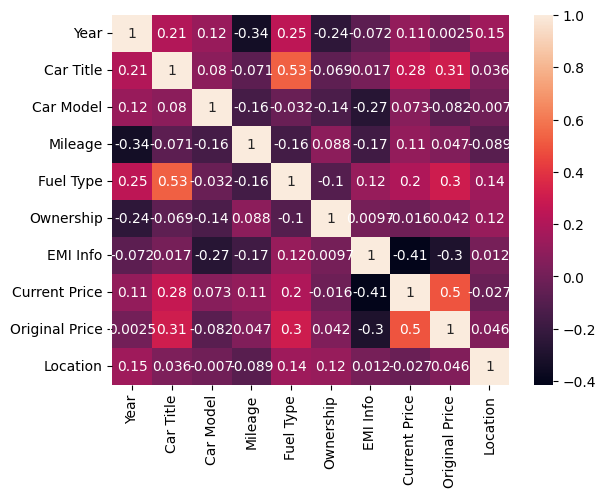

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

# Univariate

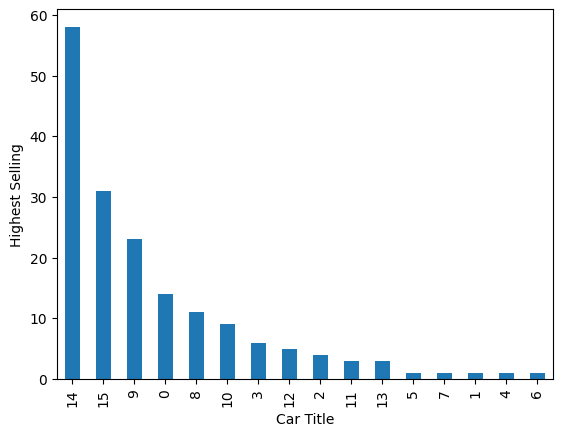

In [151]:
df['Car Title'].value_counts().plot(kind='bar')
plt.xlabel('Car Title')
plt.ylabel('Highest Selling')
plt.show()

# Price Distribution

<Axes: xlabel='Current Price', ylabel='Count'>

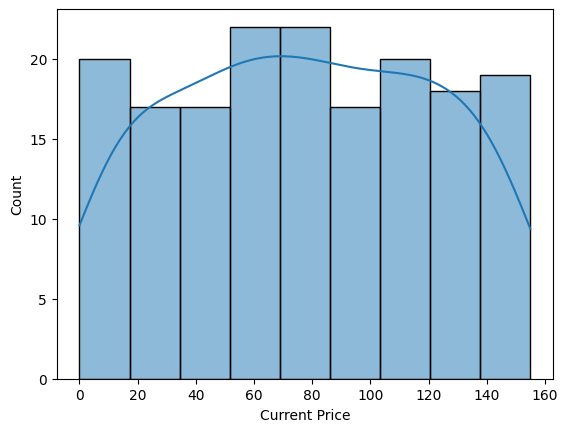

In [152]:
sns.histplot(df['Current Price'],kde=True)

In [153]:
df['Current Price'].mean(),df['Current Price'].median()

(77.51744186046511, 77.5)

# Fuel

In [154]:
import plotly.express as px

In [155]:
px.bar(df['Fuel Type'].value_counts())

# Bivariate Analysis

Vehicle Listing for different number of previous owners

<Axes: xlabel='Ownership', ylabel='Current Price'>

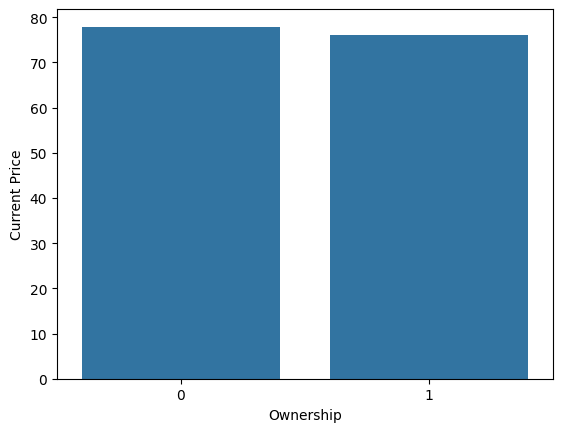

In [156]:
sns.barplot(x=df['Ownership'],y=df['Current Price'],errorbar=None)

Vehicle listing from different locations

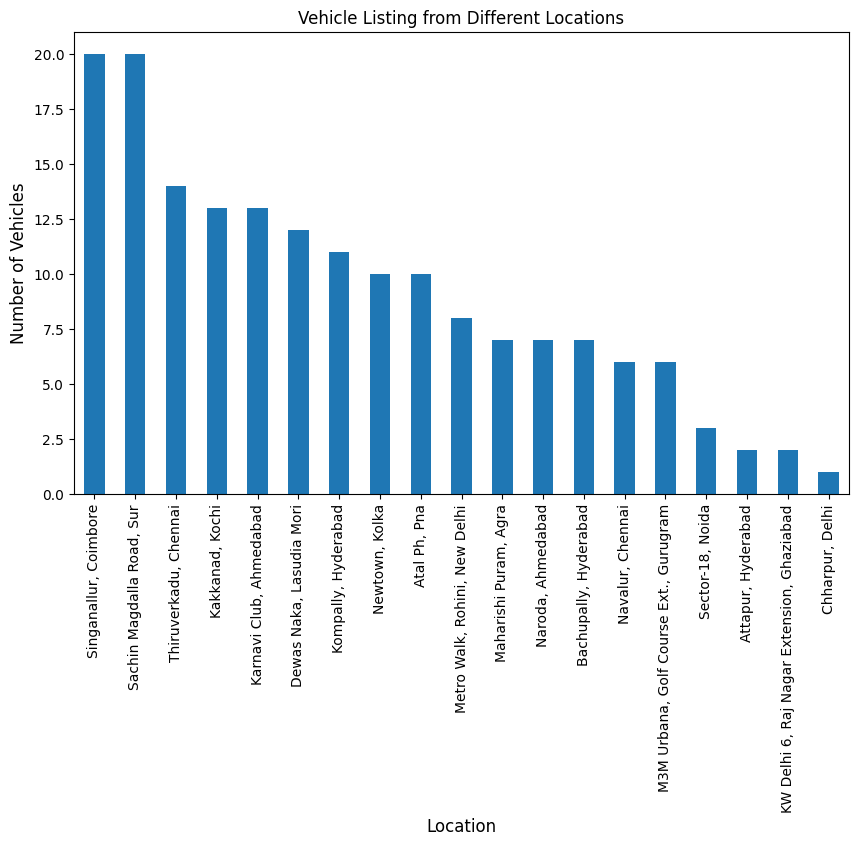

In [157]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with the encoded "Location" column
# Assuming 'label_encoders' is the dictionary with all LabelEncoders created earlier

# Retrieve the LabelEncoder for the "Location" column
location_le = label_encoders['Location']

# Create a mapping from encoded values to original names
location_mapping = dict(enumerate(location_le.classes_))

# Replace encoded "Location" values with their original names in a new column for plotting
df['Location Name'] = df['Location'].map(location_mapping)

# Plotting using the original "Location" names
df.groupby(['Location Name'])['Year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.ylabel('Number of Vehicles', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.title('Vehicle Listing from Different Locations')
plt.show()


Comparing year and price

<Axes: xlabel='Year', ylabel='Current Price'>

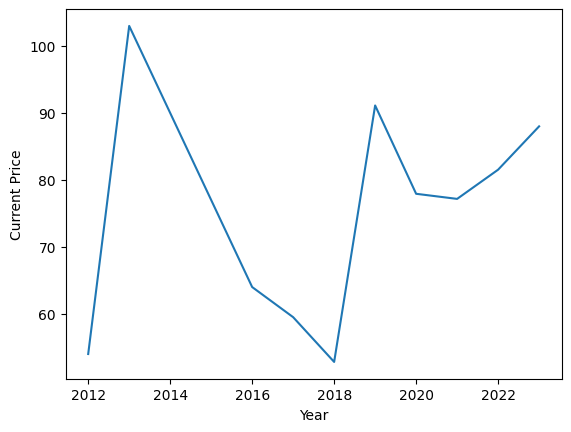

In [158]:
sns.lineplot(x=df['Year'],y=df['Current Price'],errorbar=None)

How will fuel type impact resale price

<Axes: xlabel='Fuel Type', ylabel='Current Price'>

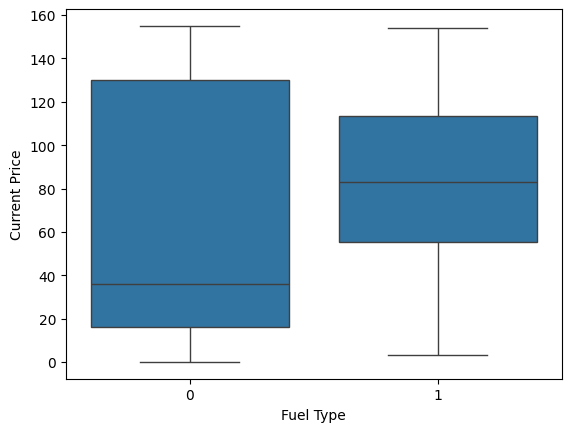

In [159]:
sns.boxplot(x=df['Fuel Type'],y=df['Current Price'])

# Multivariate Analysis

<Axes: xlabel='Year', ylabel='Current Price'>

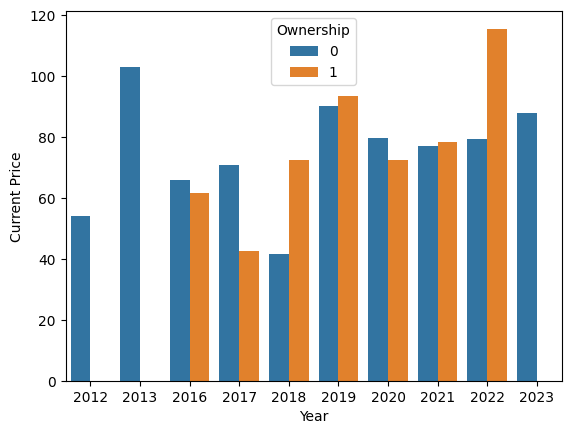

In [160]:
sns.barplot(x=df['Year'],y=df['Current Price'],errorbar=None,hue=df['Ownership'])